# Movie Genres Classification

![image](https://i.ytimg.com/vi/TjW1SsvbA9s/maxresdefault.jpg)

**Welcome all 😊**<br>

In this kernel we will go together into **Movie Poster** data to learn how use convolutional neural network **CNN** techniques and applied it on images.<br>

This kernel will be devided into the following parts<br>

<ol>
    <li><b>Data Exploration</b></li>
    <li><b>Data Preparation</b></li>
    <li><b>CNN Overview</b></li>
    <li><b>CNN Types</b></li>
    <li><b>CNN Model Building</b></li>
    <li><b>CNN Models evaluation</b></li>
</ol>

Now we will install GBU and then import libraries and load our data.

In [1]:
!pip install tensorflow-gpu==2.0.0-rc0

     |████████████████████████████████| 380.5MB 27kB/s 
     |████████████████████████████████| 4.3MB 48.3MB/s 
     |████████████████████████████████| 501kB 64.0MB/s 


In [2]:
#basic python libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm

#tensorflow libraries
import tensorflow as tf
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image

#tensorflow keras api libraries
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPool2D
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import BatchNormalization
from keras import regularizers

#other helpful libraries
from mlxtend.plotting import plot_confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import os
import shutil
%matplotlib inline

print("library loaded successfully :)")

Using TensorFlow backend.


library loaded successfully :)


# 1. Data Exploration

Now we will read our data and explore it. let's go

In [3]:
#read our data
data = pd.read_csv("/content/drive/My Drive/Movie_Poster_Dataset/train.csv")
print("data loaded successfully :)")

data loaded successfully :)


In [4]:
print("data shape = ",data.shape)
data.head()

data shape =  (7254, 27)


,Id,Genre,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,History,Horror,Music,Musical,Mystery,N/A,News,Reality-TV,Romance,Sci-Fi,Short,Sport,Thriller,War,Western
0,tt0086425,"['Comedy', 'Drama']",0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,tt0085549,"['Drama', 'Romance', 'Music']",0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
2,tt0086465,['Comedy'],0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,tt0086567,"['Sci-Fi', 'Thriller']",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
4,tt0086034,"['Action', 'Adventure', 'Thriller']",1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


After we took a quick look at our data. let's discover if it contain any missing values.

## 1.1 Missing Data

In [5]:
#get total count of data including missing data
total = data.isnull().sum().sort_values(ascending=False)

#get percent of missing data relevant to all data
percent = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)

missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(data.shape[1])

,Total,Percent
Western,0,0.0
History,0,0.0
Genre,0,0.0
Action,0,0.0
Adventure,0,0.0
Animation,0,0.0
Biography,0,0.0
Comedy,0,0.0
Crime,0,0.0
Documentary,0,0.0


**Nice** our data don't have any missing values. Now we're ready to deal with **CNN** model.<br>

# 2. Data Preparation

Before deal with **CNN** model we must specifies **X** wich refer  to images and **y** wich refere to genres. To assign all images in **X** list we will move all image to single **Folder** I will name it **images**.

In [6]:
#define image Constants
image_width  = 350
image_height = 350
image_channels = 3

#X refer to images data
X = []

folderPath = "/content/drive/My Drive/Movie_Poster_Dataset/images"
for i in tqdm(range(data.shape[0])):
    path = folderPath+"/"+data['Id'][i]+".jpg"
    img = image.load_img(path, target_size = (image_width,image_height,image_channels))
    img = image.img_to_array(img)
    img = img/255
    X.append(img)

print("All images stored in X list successfully :)")    

100%|██████████| 7254/7254 [50:23<00:00,  2.40it/s]

All images stored in X list successfully :)


In [12]:
#convert X list to array
X = np.array(X)
print("X shape : ",X.shape)

X shape :  (7254, 350, 350, 3)


Now let's show an image.

Image Id : tt0106379
Image Genres : ['Comedy', 'Drama']


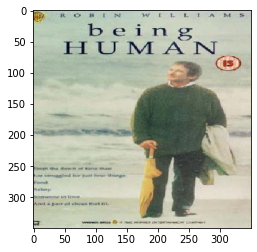

In [13]:
imgIndex = 1997
print("Image Id :",data['Id'][imgIndex])
print("Image Genres :",data['Genre'][imgIndex])
plt.imshow(X[imgIndex])
plt.show()

After we assign images to **X**, let's assign Genres to **y**. 

In [14]:
#drop Id and Genre columns
y = data.drop(['Id','Genre'], axis=1)
y = np.array(y)
y.shape

(7254, 25)

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0, test_size = 0.20)
print("Data splited into train and test successfully :)")

Data splited into train and test successfully :)


In [16]:
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, random_state = 0, test_size = 0.20)
print("Data splited into train and valid successfully :)")

Data splited into train and valid successfully :)


In [17]:
#descover train and test size
print("X_train shape : ",X_train.shape)
print("y_train shape : ",y_train.shape)

print("+++++++++++++++++++++++++++++++++++++++")

print("X_valid shape : ",X_valid.shape)
print("y_valid shape : ",y_valid.shape)

print("+++++++++++++++++++++++++++++++++++++++")

print("X_test shape : ",X_test.shape)
print("t_test shape : ",y_test.shape)

X_train shape :  (4642, 350, 350, 3)
y_train shape :  (4642, 25)
+++++++++++++++++++++++++++++++++++++++
X_valid shape :  (1161, 350, 350, 3)
y_valid shape :  (1161, 25)
+++++++++++++++++++++++++++++++++++++++
X_test shape :  (1451, 350, 350, 3)
t_test shape :  (1451, 25)


Now, after we prepared our data let's take overview about **CNN**.

# 3. CNN Overview
<hr>

## 3.1 Biological inspiration

<br>

![image](https://ars.els-cdn.com/content/image/1-s2.0-S0960982214010392-gr1.jpg)



Image from [sciencedirect](https://www.sciencedirect.com/science/article/pii/S0960982214010392)

CNNs specifically are inspired by the biological visual cortex. The cortex has small regions of cells that are sensitive to the specific areas of the visual field. This idea was expanded by a captivating experiment done by Hubel and Wiesel in 1962. [datacamp](https://www.datacamp.com/community/tutorials/convolutional-neural-networks-python?utm_source=adwords_ppc&utm_campaignid=1455363063&utm_adgroupid=65083631748&utm_device=c&utm_keyword=&utm_matchtype=b&utm_network=g&utm_adpostion=&utm_creative=278443377092&utm_targetid=aud-299261629574:dsa-473406581915&utm_loc_interest_ms=&utm_loc_physical_ms=9048955&gclid=CjwKCAjw4KD0BRBUEiwA7MFNTXEc6XioFqrNKi_Ivb2YietH1wRCeULbPDkxBUNgyBrxRMF8kuSWLhoCTF8QAvD_BwE)

## 3.2 In deep learning
A Convolutional Neural Network (ConvNet/CNN) is a Deep Learning algorithm which can take in an input image, assign importance (learnable weights and biases) to various aspects/objects in the image and be able to differentiate one from the other. The pre-processing required in a ConvNet is much lower as compared to other classification algorithms. While in primitive methods filters are hand-engineered, with enough training, ConvNets have the ability to learn these filters/characteristics. [towardsdatascience](https://towardsdatascience.com/a-comprehensive-guide-to-convolutional-neural-networks-the-eli5-way-3bd2b1164a53)

<br>

![image](https://www.symmetrymagazine.org/sites/default/files/images/standard/neural_network_visual_final.jpg)

Image from [symmetrymagazine](https://www.symmetrymagazine.org/article/neural-networks-meet-space)

<br>

**CNN** basically based on **Convolutional Layers** but **what is Convolutional Layers ?**<br>
A convolutional layer contains a set of filters whose parameters need to be learned. The height and weight of the filters are smaller than those of the input volume. Each filter is convolved with the input volume to compute an activation map made of neurons. In other words, the filter is slid across the width and height of the input and the dot products between the input and filter are computed at every spatial position. [sciencedirect](https://www.sciencedirect.com/topics/engineering/convolutional-layer)

<br>
![image](https://cdn-media-1.freecodecamp.org/images/Htskzls1pGp98-X2mHmVy9tCj0cYXkiCrQ4t)

<br>

Image from [freecodecamp](https://www.freecodecamp.org/news/an-intuitive-guide-to-convolutional-neural-networks-260c2de0a050/)







# 4. CNN Types

Now let's talk about **CNN** types 


* LeNet
* AlexNet
* VGGNet 16
* GoogleNet / Inception
* ResNets

## 4.1 LeNet

A ground-breaking algorithm that was the first of its kind and capability, in-terms-of object classification. Originally trained to classify hand written digits from 0–9, of the MNIST Dataset. It comprises of 7 — layers, all made of trainable parameters. It takes in a 32 X 32 pixel image, which was comparatively large in size w.r.t the images present in the data sets on which the network was trained. The activation function applied is RELU function. The layers are arranged in the following manner. [towardsdatascience](https://towardsdatascience.com/various-types-of-convolutional-neural-network-8b00c9a08a1b)

<br>

![image](https://miro.medium.com/max/850/1*AwJZkWLKabIicUPzSN6KCg.png)

Image from [medium](https://medium.com/deep-learning-g/build-lenet-from-scratch-7bd0c67a151e)

<br>

* The First Convolutional Layer consist of 6 filters of size 5 X 5 and a stride of 1.
* The Second Layer is a “sub-sampling” or average-pooling layer of size 2 X 2 and a stride of 2.
* The Third Layer is also a Convolutional layer consisting of 16 filters of size 5 X 5 and stride of 1.
* The Fourth Layer is again an average-pooling layer of size 2 X 2 and stride of 2.
* The Fifth Layer is connecting the output of the fourth layer (400 parameters) to a fully connected layer of 120 nodes.
* The Sixth Layer is a similarly fully-connected layer consisting of 84 nodes, deriving from the outputs of the 120 nodes of the fifth-layer.
* The Seventh Layer (, or the last layer) consist of classifying the output of the last layer into 10 classes related to the 10-digits that it was primarily trained to classify

[towardsdatascience](https://towardsdatascience.com/various-types-of-convolutional-neural-network-8b00c9a08a1b)

**let's implement it**

In [18]:
LeNetModel = Sequential()
#First Convolutional Layer
LeNetModel.add(Conv2D(6, (5,5), activation='relu',padding="valid", 
                      kernel_regularizer = regularizers.l2(0.01), 
                      activity_regularizer=regularizers.l2(0.01),
                      input_shape = X_train[0].shape))
#Second Layer 
LeNetModel.add(AveragePooling2D(pool_size=(2, 2), strides=2))
#Third Layer
LeNetModel.add(Conv2D(16, (5,5), activation='relu',
                      kernel_regularizer = regularizers.l2(0.01),
                      activity_regularizer=regularizers.l2(0.01)))
# Fourth Layer
LeNetModel.add(AveragePooling2D(pool_size=(2, 2), strides=2))

LeNetModel.add(Flatten())
#Fifth Layer
LeNetModel.add(Dense(120, activation='relu',
                     kernel_regularizer = regularizers.l2(0.01),
                     activity_regularizer=regularizers.l2(0.01)))
#Sixth Layer 
LeNetModel.add(Dense(84, activation='relu',
                     kernel_regularizer = regularizers.l2(0.01),
                     activity_regularizer=regularizers.l2(0.01)))
#output layer
LeNetModel.add(Dense(25, activation='sigmoid'))

LeNetModel.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 346, 346, 6)       456       
_________________________________________________________________
average_pooling2d (AveragePo (None, 173, 173, 6)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 169, 169, 16)      2416      
_________________________________________________________________
average_pooling2d_1 (Average (None, 84, 84, 16)        0         
_________________________________________________________________
flatten (Flatten)            (None, 112896)            0         
_________________________________________________________________
dense (Dense)                (None, 120)               13547640  
_________________________________________________________________
dense_1 (Dense)              (None, 84)                1

**Now** let's compile our **LeNet** model.

In [19]:
LeNetModel.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])
print("LeNet model compiled successfully :)")

LeNet model compiled successfully :)


**Now** let's train our **LeNet** model.

In [20]:
LeNetHistory = LeNetModel.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid), batch_size = None) 

Train on 4642 samples, validate on 1161 samples
Epoch 1/10
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
4642/4642 [==============================] - 153s 33ms/sample - loss: 4.4403 - accuracy: 0.8895 - val_loss: 0.6796 - val_accuracy: 0.9062
Epoch 2/10
4642/4642 [==============================] - 149s 32ms/sample - loss: 0.5144 - accuracy: 0.9071 - val_loss: 0.4353 - val_accuracy: 0.9062
Epoch 3/10
4642/4642 [==============================] - 148s 32ms/sample - loss: 0.3938 - accuracy: 0.9069 - val_loss: 0.3708 - val_accuracy: 0.9062
Epoch 4/10
4642/4642 [==============================] - 149s 32ms/sample - loss: 0.3512 - accuracy: 0.9066 - val_loss: 0.3407 - val_accuracy: 0.9062
Epoch 5/10
4642/4642 [==============================] - 147s 32ms/sample - loss: 0.3287 - accuracy: 0.9066 - val_loss: 0.3237 - val_accuracy: 0.9062
Epoch 6/10
4642/4642 [==============================] - 148s 32ms/sample - loss: 0.3151 - accuracy: 0.9072 - val_

As we see **training accuracy** and **validation accuracy** almost equal **90%**. let's now draw graphs to get more insights.

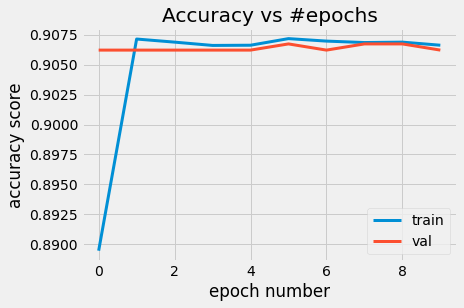

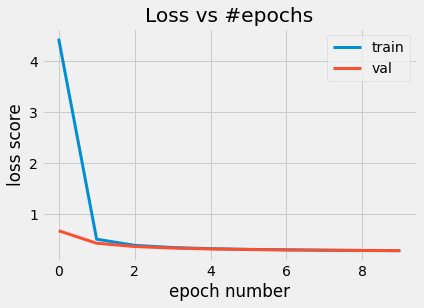

In [21]:
plt.style.use('fivethirtyeight')
LW = 3 #line width (lw)

plt.plot(LeNetHistory.history['accuracy'], linewidth = LW)
plt.plot(LeNetHistory.history['val_accuracy'], linewidth = LW)
plt.title("Accuracy vs #epochs")
plt.xlabel("epoch number")
plt.ylabel("accuracy score")
plt.legend(['train','val'])
plt.show()

print()

plt.plot(LeNetHistory.history['loss'], linewidth = LW)
plt.plot(LeNetHistory.history['val_loss'], linewidth = LW)
plt.title("Loss vs #epochs")
plt.xlabel("epoch number")
plt.ylabel("loss score")
plt.legend(['train','val'])
plt.show()

## 4.2 AlexNet

The network is similar to the LeNet Architecture, but has a large no. of filters compared to the original LeNet, and thus was able to classify among a large class of objects. Moreover, it used “dropout” instead of regularization, to deal with overfitting. (Dropout essentially decreases the size of the no. of parameters to be accounted for during the process of training/learning). [towardsdatascience](https://towardsdatascience.com/various-types-of-convolutional-neural-network-8b00c9a08a1b)

<br>

![image](https://neurohive.io/wp-content/uploads/2018/10/AlexNet-1.png)

Image from [neurohive.io](https://neurohive.io/en/popular-networks/alexnet-imagenet-classification-with-deep-convolutional-neural-networks/)

* First, a Convolution Layer (CL) of 96 filters of size 11 X 11 and stride 4.
* Next, a Max-Pooling Layer (M-PL) of filter size 3 X 3 and stride = 2.
* Again, a CL of 256 filters of size 5 X 5 and stride = 4.
* Then, a M-PL of filter size 3 X 3 and stride = 2.
* Again, a CL of 384 filters of size 3 X 3 and stride = 4.
* Again, a CL of 384 filters of size 3 X 3 and stride = 4.
* Again, a CL of 256 filters of size 3 X 3 and stride = 4.
* Then, a M-Pl of filter size 3 X 3 and stride = 2.
* The output of the last layer, when converted into input-layer like for the Fully Connected Block consists of 9261 nodes, fully connected to a hidden layer with 4096 nodes.
* The first hidden layer is again fully connected to another hidden layer consisting 4096 nodes.
* This last hidden layer is fully connected to the output layer implementing “softmax regression” of 1000 nodes.

[towardsdatascience](https://towardsdatascience.com/various-types-of-convolutional-neural-network-8b00c9a08a1b)

**let's implement it**

In [22]:
AlexNetModel = Sequential()

AlexNetModel.add(Conv2D(96, (11,11), activation='relu', strides=4, input_shape = X_train[0].shape))
AlexNetModel.add(MaxPool2D(pool_size=(3,3), strides=2))

AlexNetModel.add(Conv2D(256, (5,5), activation='relu', strides=4))
AlexNetModel.add(MaxPool2D(pool_size=(3,3), strides=2))

AlexNetModel.add(Conv2D(384, (3,3), activation='relu', strides=4))
AlexNetModel.add(Conv2D(384, (3,3), padding="same", activation='relu', strides=4))
AlexNetModel.add(Conv2D(256, (3,3), padding="same", activation='relu', strides=4))
AlexNetModel.add(MaxPool2D(pool_size=(3,3), padding="same", strides=2))

AlexNetModel.add(Flatten())
AlexNetModel.add(Dense(4096, activation='relu'))
AlexNetModel.add(Dense(4096, activation='relu'))

#output layer
AlexNetModel.add(Dense(25, activation='sigmoid'))

AlexNetModel.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 85, 85, 96)        34944     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 42, 42, 96)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 10, 10, 256)       614656    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 4, 4, 256)         0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 1, 1, 384)         885120    
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 1, 1, 384)         1327488   
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 1, 1, 256)        

**Now** let's compile our **AlexNet** model.

In [23]:
AlexNetModel.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])
print("AlexNet model compiled successfully :)")

AlexNet model compiled successfully :)


**Now** let's train our **AlexNet** model

In [24]:
AlexNetHistory = AlexNetModel.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid), batch_size = None) 

Train on 4642 samples, validate on 1161 samples
Epoch 1/10
4642/4642 [==============================] - 38s 8ms/sample - loss: 0.2593 - accuracy: 0.9025 - val_loss: 0.2483 - val_accuracy: 0.9067
Epoch 2/10
4642/4642 [==============================] - 37s 8ms/sample - loss: 0.2446 - accuracy: 0.9070 - val_loss: 0.2445 - val_accuracy: 0.9076
Epoch 3/10
4642/4642 [==============================] - 37s 8ms/sample - loss: 0.2407 - accuracy: 0.9076 - val_loss: 0.2437 - val_accuracy: 0.9090
Epoch 4/10
4642/4642 [==============================] - 38s 8ms/sample - loss: 0.2390 - accuracy: 0.9095 - val_loss: 0.2393 - val_accuracy: 0.9098
Epoch 5/10
4642/4642 [==============================] - 37s 8ms/sample - loss: 0.2383 - accuracy: 0.9103 - val_loss: 0.2411 - val_accuracy: 0.9079
Epoch 6/10
4642/4642 [==============================] - 37s 8ms/sample - loss: 0.2374 - accuracy: 0.9104 - val_loss: 0.2388 - val_accuracy: 0.9117
Epoch 7/10
4642/4642 [==============================] - 38s 8ms/sample

As we see **training accuracy** accuracy almost equal 92% and **validation accuracy** almost equal 91%. let's now draw graphs to get more insights.

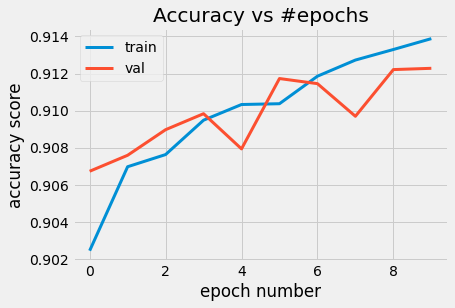

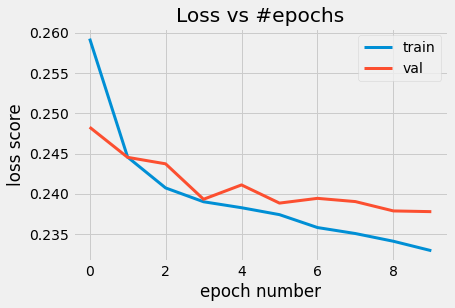

In [25]:
plt.style.use('fivethirtyeight')
LW = 3 #line width (lw)

plt.plot(AlexNetHistory.history['accuracy'], linewidth = LW)
plt.plot(AlexNetHistory.history['val_accuracy'], linewidth = LW)
plt.title("Accuracy vs #epochs")
plt.xlabel("epoch number")
plt.ylabel("accuracy score")
plt.legend(['train','val'])
plt.show()

print()

plt.plot(AlexNetHistory.history['loss'], linewidth = LW)
plt.plot(AlexNetHistory.history['val_loss'], linewidth = LW)
plt.title("Loss vs #epochs")
plt.xlabel("epoch number")
plt.ylabel("loss score")
plt.legend(['train','val'])
plt.show()

## 4.3 VGGNet 16

VGG16 is a convolutional neural network model proposed by K. Simonyan and A. Zisserman from the University of Oxford in the paper “Very Deep Convolutional Networks for Large-Scale Image Recognition”. The model achieves 92.7% top-5 test accuracy in ImageNet, which is a dataset of over 14 million images belonging to 1000 classes. It was one of the famous model submitted to ILSVRC-2014. It makes the improvement over AlexNet by replacing large kernel-sized filters (11 and 5 in the first and second convolutional layer, respectively) with multiple 3×3 kernel-sized filters one after another. VGG16 was trained for weeks and was using NVIDIA Titan Black GPU’s. [neurohive.io](https://neurohive.io/en/popular-networks/vgg16/)

<br>

![image](https://neurohive.io/wp-content/uploads/2018/11/vgg16-1-e1542731207177.png)

Image from [neurohive.io](https://neurohive.io/en/popular-networks/vgg16/)

<br>

**layer are constant:**
<br>
CONVOLUTION LAYER has filters of size 3 X 3 and stride = 1 
<br>
and the MAX-POOLING LAYER has filters of size 2 X 2 and stride = 2.
<br> 

* Convolutional Layer (CL) of 64 filters.
* CL of 64 filters again.
* Max-Pooling Layer (M-PL)
* CL of 128 filters.
* CL of 128 filters again.
* M-PL.
* CL of 256 filters.
* CL of 256 filters again.
* CL of 256 filters again.
* M-PL.
* CL of 512 filters.
* CL of 512 filters again.
* CL of 512 filters again.
* M-PL.
* CL of 512 filters.
* CL of 512 filters again.
* CL of 512 filters again.
* M-PL.
* The output of the last Pooling Layer is fed into a fully connected hidden layer consisting of 4096 nodes.
* This is again fully connected to another hidden layer consisting again of 4096 nodes.
* This is fully connected to an output layer implementing “softmax regression”, classifying among 1000 classes of objects
<a href="https://towardsdatascience.com/various-types-of-convolutional-neural-network-8b00c9a08a1b">towardsdatascience</a>

**let's implement it**




In [26]:
VGG16Model = Sequential()

VGG16Model.add(Conv2D(64, (3,3), activation='relu', strides=1, input_shape = X_train[0].shape))
VGG16Model.add(Conv2D(64, (3,3), activation='relu', strides=1))
VGG16Model.add(MaxPool2D(pool_size=(2,2), strides=2))

VGG16Model.add(Conv2D(128, (3,3), activation='relu', strides=1))
VGG16Model.add(Conv2D(128, (3,3), activation='relu', strides=1))
VGG16Model.add(MaxPool2D(pool_size=(2,2), strides=2))

VGG16Model.add(Conv2D(256, (3,3), activation='relu', strides=1))
VGG16Model.add(Conv2D(256, (3,3), activation='relu', strides=1))
VGG16Model.add(Conv2D(128, (3,3), activation='relu', strides=1))
VGG16Model.add(MaxPool2D(pool_size=(2,2), strides=2))

VGG16Model.add(Conv2D(512, (3,3), activation='relu', strides=1))
VGG16Model.add(Conv2D(512, (3,3), activation='relu', strides=1))
VGG16Model.add(Conv2D(512, (3,3), activation='relu', strides=1))
VGG16Model.add(MaxPool2D(pool_size=(2,2), strides=2))

VGG16Model.add(Conv2D(512, (3,3), activation='relu', strides=1))
VGG16Model.add(Conv2D(512, (3,3), activation='relu', strides=1))
VGG16Model.add(Conv2D(512, (3,3), activation='relu', strides=1))
VGG16Model.add(MaxPool2D(pool_size=(2,2), strides=2))

VGG16Model.add(Flatten())

VGG16Model.add(Dense(4096, activation='relu'))
VGG16Model.add(Dense(4096, activation='relu'))
VGG16Model.add(Dense(25, activation='sigmoid'))

VGG16Model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 348, 348, 64)      1792      
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 346, 346, 64)      36928     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 173, 173, 64)      0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 171, 171, 128)     73856     
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 169, 169, 128)     147584    
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 84, 84, 128)       0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 82, 82, 256)      

**Now** let's compile our **VGG16** model.

In [27]:
VGG16Model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])
print("VGG16Model model compiled successfully :)")

VGG16Model model compiled successfully :)


**Now** let's train our **VGG16** model

In [28]:
VGG16ModelHistory = VGG16Model.fit(X_train, y_train, epochs=5, validation_data=(X_valid, y_valid), batch_size = None) 

Train on 4642 samples, validate on 1161 samples
Epoch 1/5
4642/4642 [==============================] - 1628s 351ms/sample - loss: 0.7240 - accuracy: 0.9009 - val_loss: 0.2507 - val_accuracy: 0.9067
Epoch 2/5
4642/4642 [==============================] - 1624s 350ms/sample - loss: 0.2456 - accuracy: 0.9063 - val_loss: 0.2480 - val_accuracy: 0.9062
Epoch 3/5
4642/4642 [==============================] - 1622s 349ms/sample - loss: 0.2448 - accuracy: 0.9072 - val_loss: 0.2475 - val_accuracy: 0.9067
Epoch 4/5
4642/4642 [==============================] - 1614s 348ms/sample - loss: 0.2448 - accuracy: 0.9076 - val_loss: 0.2477 - val_accuracy: 0.9062
Epoch 5/5
4642/4642 [==============================] - 1618s 349ms/sample - loss: 0.2443 - accuracy: 0.9066 - val_loss: 0.2471 - val_accuracy: 0.9062


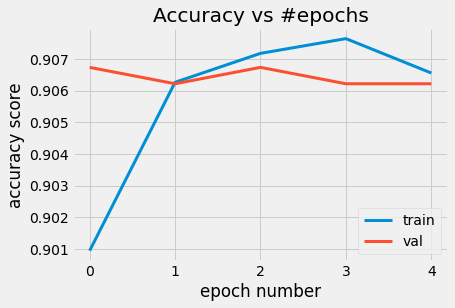

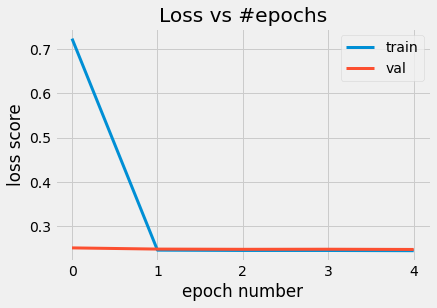

In [29]:
plt.style.use('fivethirtyeight')
LW = 3 #line width (lw)

plt.plot(VGG16ModelHistory.history['accuracy'], linewidth = LW)
plt.plot(VGG16ModelHistory.history['val_accuracy'], linewidth = LW)
plt.title("Accuracy vs #epochs")
plt.xlabel("epoch number")
plt.ylabel("accuracy score")
plt.legend(['train','val'])
plt.show()

print()

plt.plot(VGG16ModelHistory.history['loss'], linewidth = LW)
plt.plot(VGG16ModelHistory.history['val_loss'], linewidth = LW)
plt.title("Loss vs #epochs")
plt.xlabel("epoch number")
plt.ylabel("loss score")
plt.legend(['train','val'])
plt.show()

**Now we will save AlexNet model for reuse purpose**

In [0]:
AlexNetModel.save("AlexNetModel.h5")